# HOTOSM and AWS Athena Example


In [37]:
import seaborn as sns
import pandas as pd
import datetime, sys
import matplotlib, statistics

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## First, pull all changesets from Athena (using the AWS OSM Public Dataset)

```sql
SELECT date_trunc('week', changesets.created_at) week, 
       count(planet_history.id) new_buildings,
       count(distinct(planet_history.uid)) users
FROM planet_history, changesets
WHERE planet_history.changeset = changesets.id 
  AND (planet_history.tags['building'] = 'yes'
   OR planet_history.tags['building'] = 'house' )
  AND planet_history.version = 1
  AND lower(changesets.tags['comment']) LIKE '%hotosm%'
group by date_trunc('week', changesets.created_at)
order by date_trunc('week', changesets.created_at) asc
```

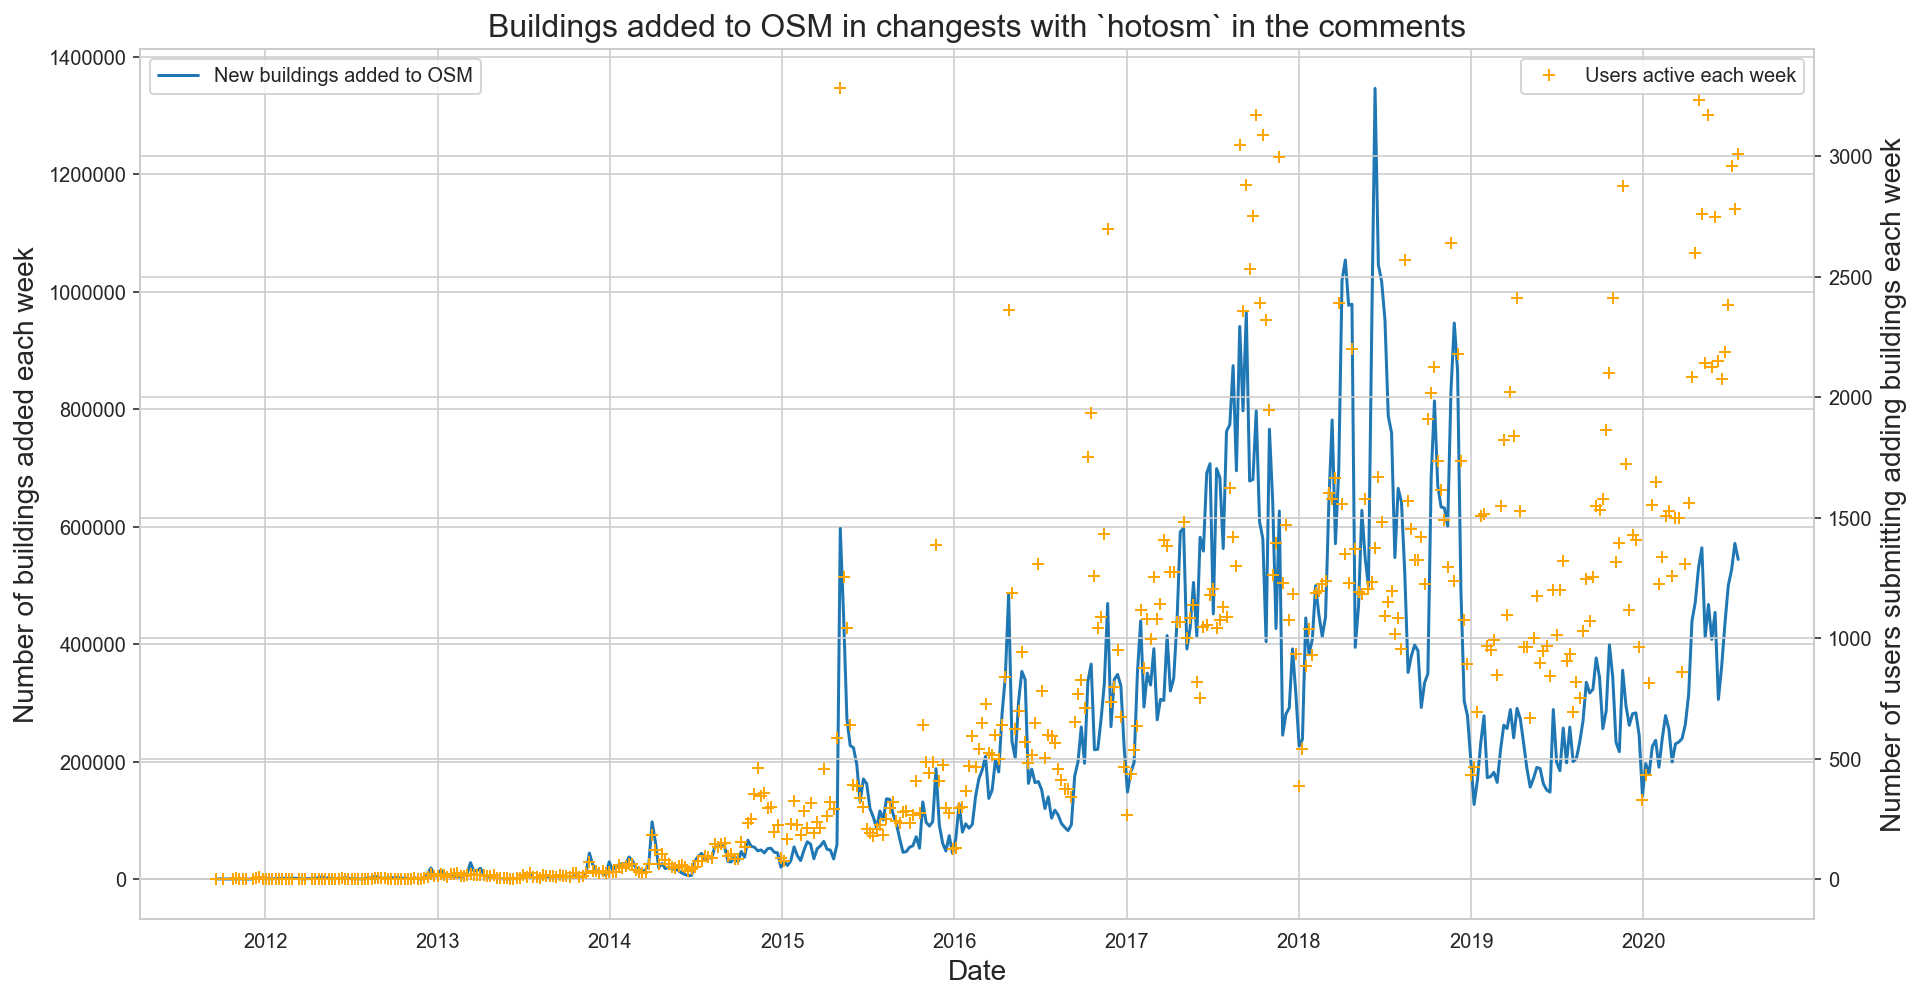

In [38]:
df2 = pd.read_csv('./data/hotosm_buildings_history.csv')
df2['week'] = df.week.apply(lambda t: pd.Timestamp(t).date())
df2.head(2)

sns.set_style("whitegrid")

ax = df2.set_index('week')['new_buildings'].plot(figsize=(15,8), style="-")


ax.set_xlabel("Date", fontsize=14);
ax.set_title("Buildings added to OSM in changests with `hotosm` in the comments", fontsize=16);
ax.set_ylabel("Number of buildings added each week", fontsize=14)
ax.legend(['New buildings added to OSM'], loc='upper left');

ax2 = ax.twinx(); 
df2.set_index('week')['users'].plot(figsize=(15,8), style="+", ax=ax2, color='orange')
ax2.set_ylabel("Number of users submitting adding buildings each week", fontsize=14);
ax2.legend(['Users active each week'], loc='upper right'); 


### That's using the planet history, but what if we only searched the current planet? 

In [39]:
df = pd.read_csv('./data/hotosm_buildings.csv')
df['week'] = df.week.apply(lambda t: pd.Timestamp(t).date())
df.head(2)

,week,new_buildings,users
0,2011-09-19,213,3
1,2011-10-03,10,2


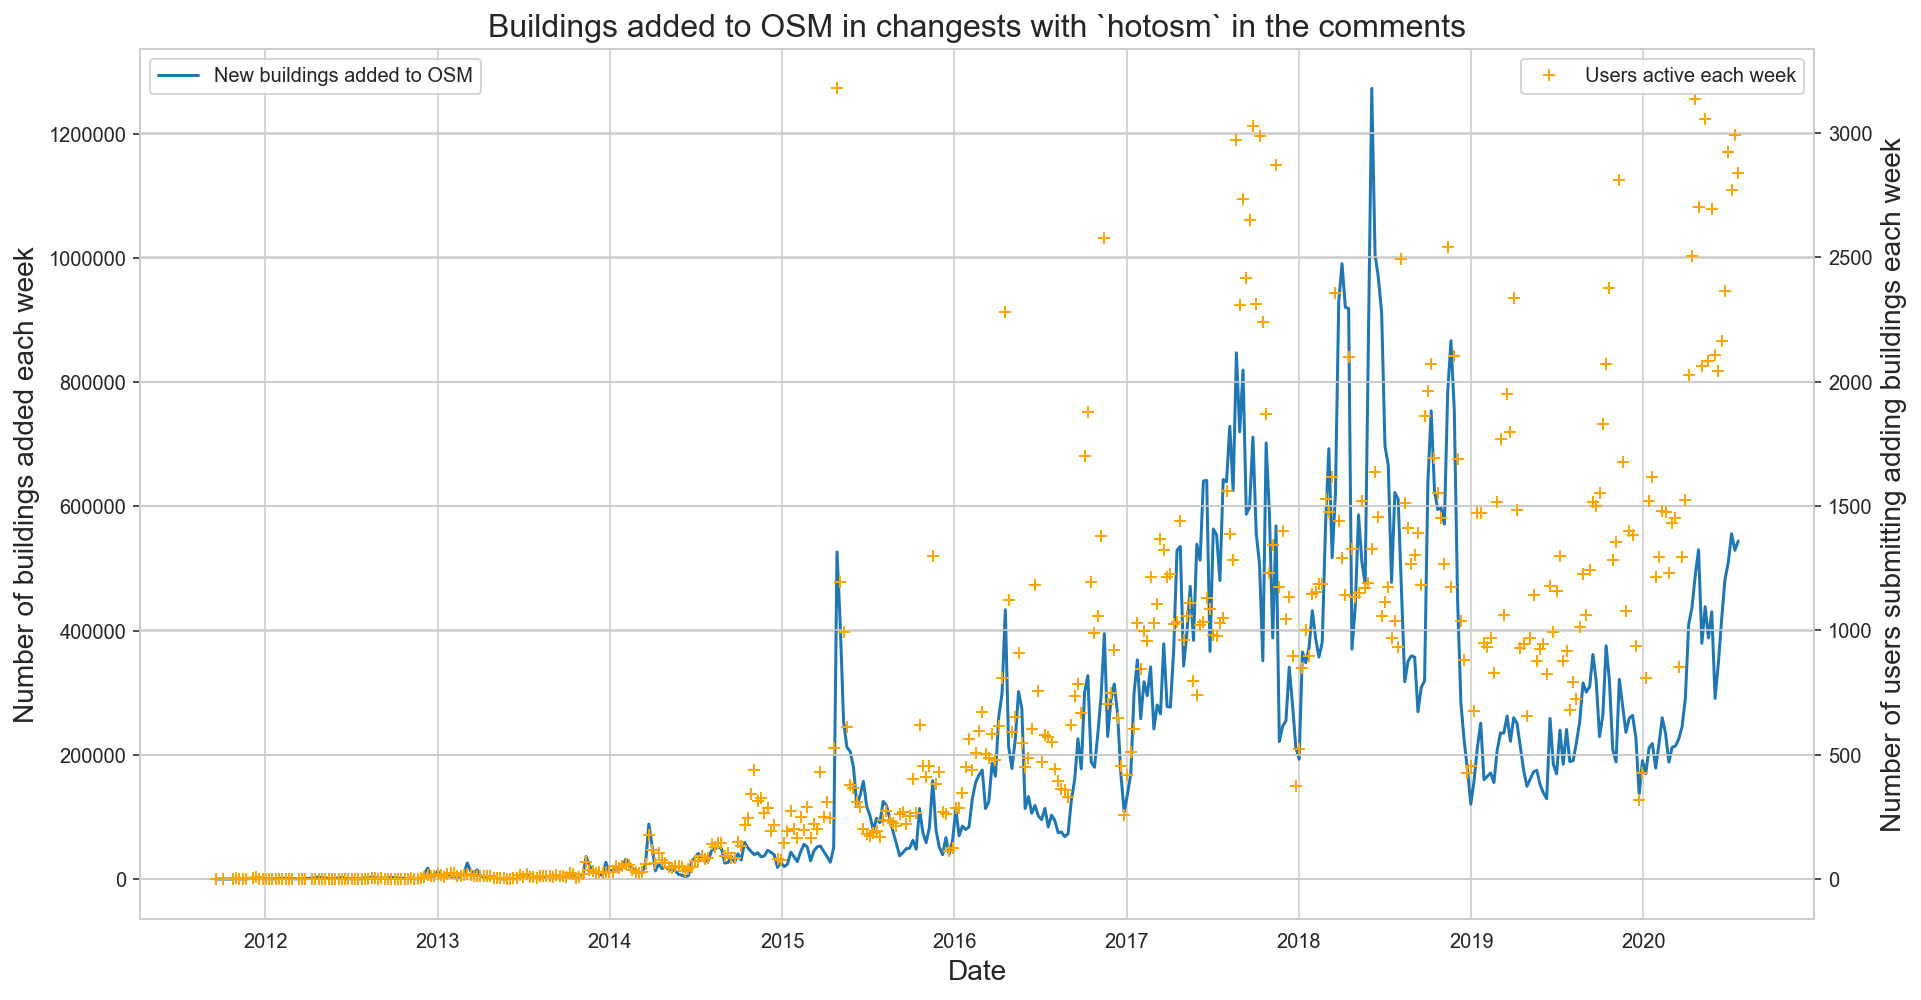

In [40]:
sns.set_style("whitegrid")

ax = df.set_index('week')['new_buildings'].plot(figsize=(15,8), style="-")

ax.set_xlabel("Date", fontsize=14);
ax.set_title("Buildings added to OSM in changests with `hotosm` in the comments", fontsize=16);
ax.set_ylabel("Number of buildings added each week", fontsize=14)
ax.legend(['New buildings added to OSM'], loc='upper left');

ax2 = ax.twinx(); 
df.set_index('week')['users'].plot(figsize=(15,8), style="+", ax=ax2, color='orange')
ax2.set_ylabel("Number of users submitting adding buildings each week", fontsize=14);
ax2.legend(['Users active each week'], loc='upper right'); 


In [41]:
df.sum()

new_buildings    90765912
users              331073
dtype: int64

In [42]:
df2.sum()

new_buildings    100310311
users               340018
dtype: int64

This tells us that about 9.3 Million buildings initially added during a HOT-related changeset have been since updated. Additionally, 90.7M buildings created in a HOT-related changeset have not been subseqeuntly updated _at the way level_. It is very possible there are _minor versions_ of those buildings